## Final Web App

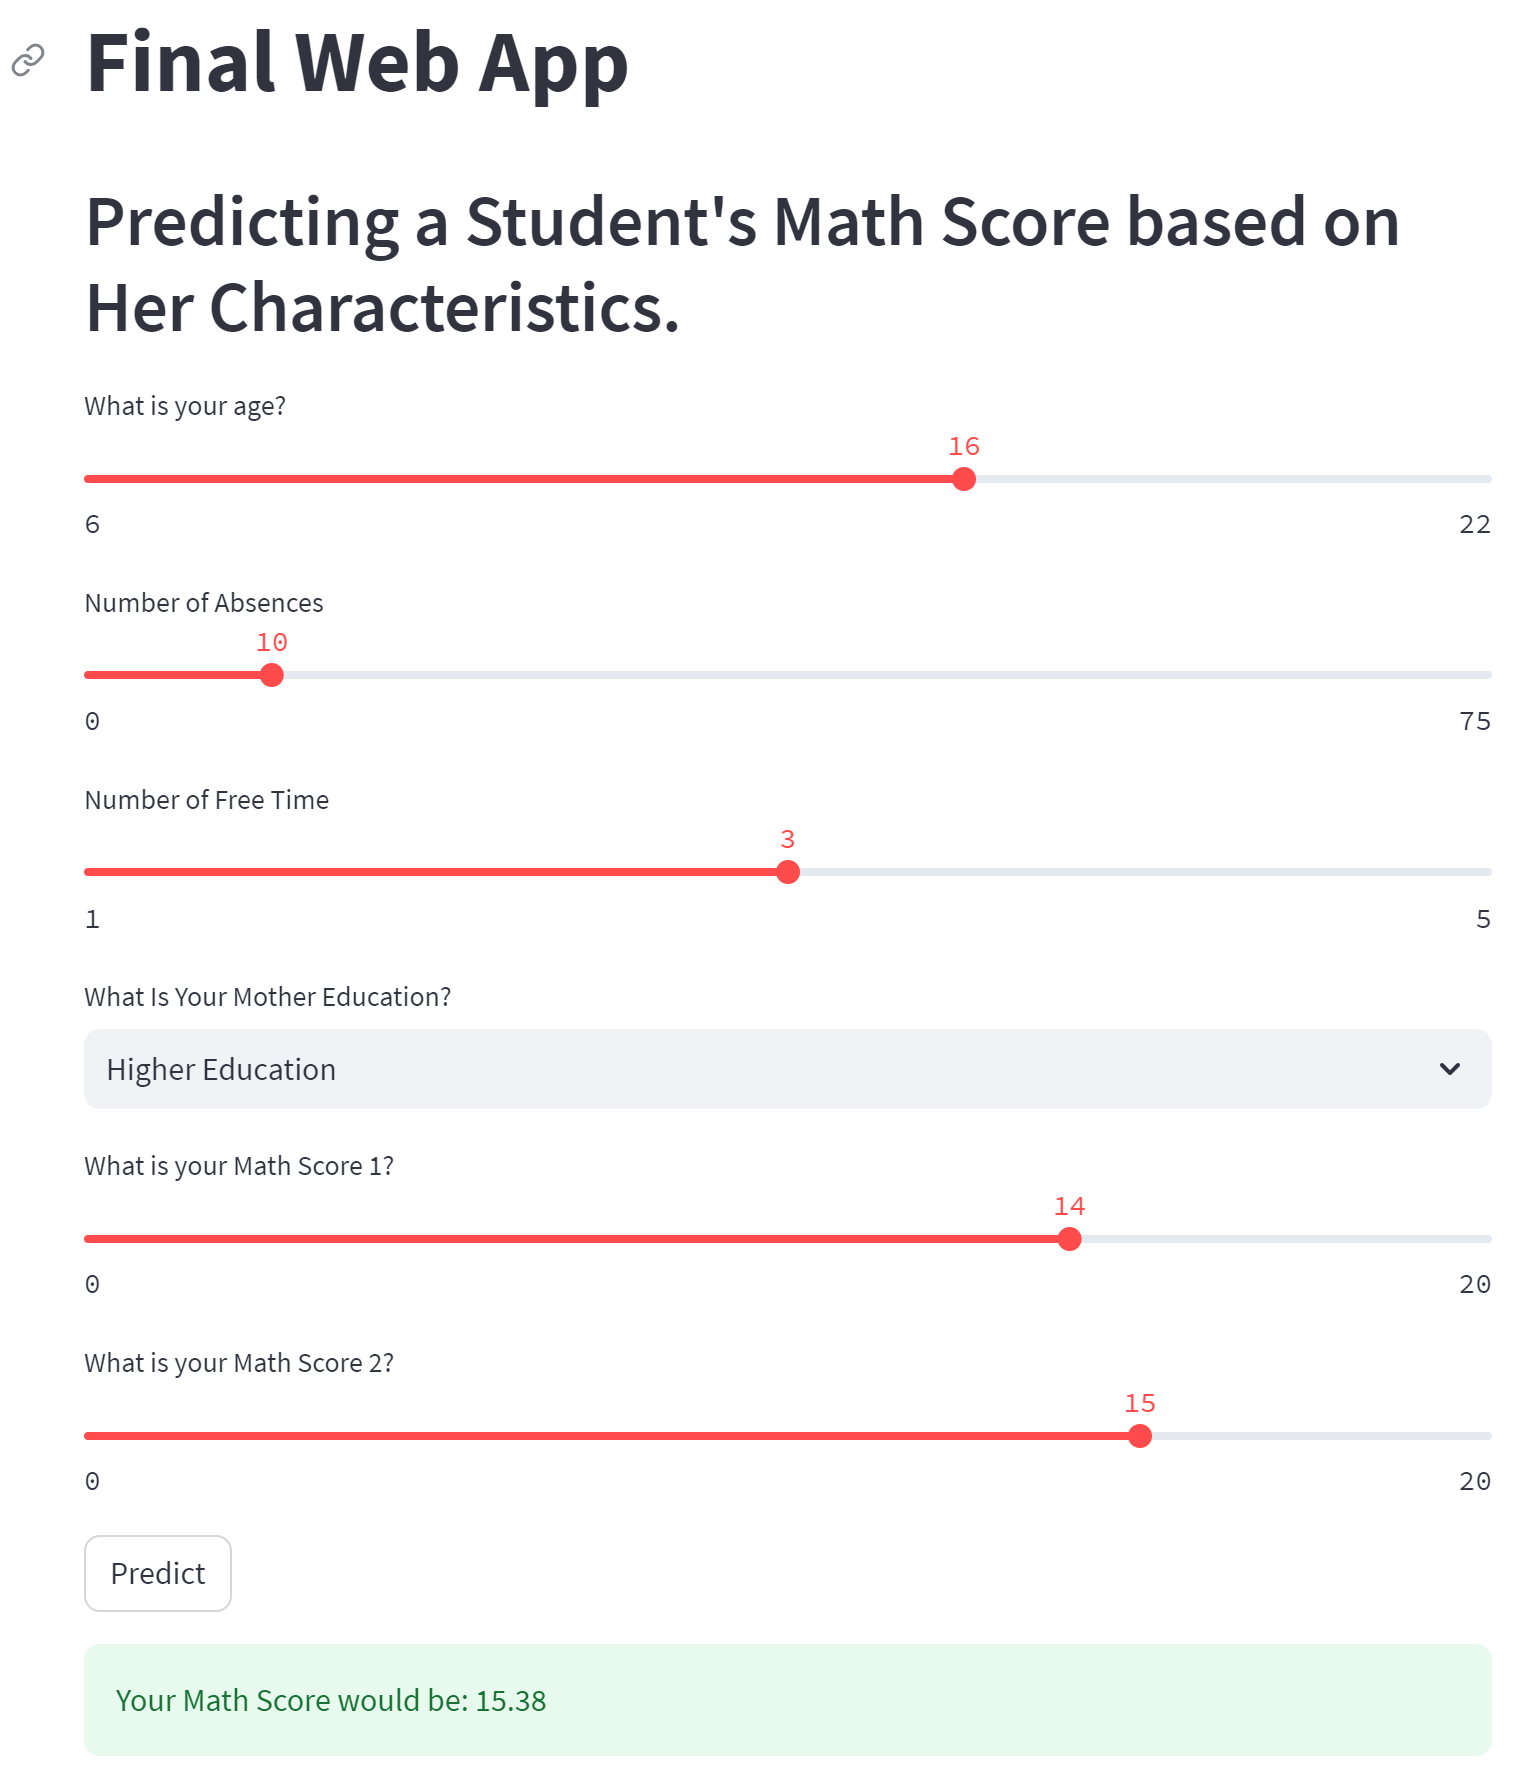

## Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Read Data

In [ ]:
df = pd.read_csv("Data/student-mat.csv",sep=";")

## EDA

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
df = df[["age","absences","freetime","Medu","G1","G2","G3"]]

In [ ]:
df.head()

,age,absences,freetime,Medu,G1,G2,G3
0,18,6,3,4,5,6,6
1,17,4,3,1,5,5,6
2,15,10,3,1,7,8,10
3,15,2,2,4,15,14,15
4,16,4,3,3,6,10,10


In [ ]:
df.describe()

,age,absences,freetime,Medu,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,3.235443,2.749367,10.908861,10.713924,10.415190
std,1.276043,8.003096,0.998862,1.094735,3.319195,3.761505,4.581443
min,15.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,3.000000,2.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,3.000000,3.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,4.000000,4.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,5.000000,4.000000,19.000000,19.000000,20.000000


In [ ]:
df.dtypes

age         int64
absences    int64
freetime    int64
Medu        int64
G1          int64
G2          int64
G3          int64
dtype: object

In [ ]:
df.isnull().sum()

age         0
absences    0
freetime    0
Medu        0
G1          0
G2          0
G3          0
dtype: int64

In [ ]:
predict = "G3"
X = np.array(df.drop(columns=predict))
Y = np.array (df[predict])

In [ ]:
X

array([[18,  6,  3,  4,  5,  6],
       [17,  4,  3,  1,  5,  5],
       [15, 10,  3,  1,  7,  8],
       ...,
       [21,  3,  5,  1, 10,  8],
       [18,  0,  4,  3, 11, 12],
       [19,  5,  2,  1,  8,  9]], dtype=int64)

In [ ]:
Y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [ ]:
X.shape

(395, 6)

In [ ]:
Y.shape

(395,)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train.shape

(355, 6)

In [ ]:
X_test.shape

(40, 6)

In [ ]:
X_train

array([[17,  0,  4,  2, 10,  9],
       [18,  8,  4,  2, 14, 12],
       [17,  2,  3,  1, 10, 10],
       ...,
       [18, 10,  4,  4, 10,  9],
       [17,  0,  1,  4, 11, 11],
       [18,  0,  4,  3,  6,  8]], dtype=int64)

In [ ]:
X_test

array([[16,  6,  4,  2,  8, 10],
       [17,  4,  1,  1,  8,  9],
       [18,  0,  3,  2,  8,  8],
       [15, 26,  3,  3,  7,  6],
       [19, 22,  2,  3, 13, 10],
       [15,  0,  2,  3, 16, 18],
       [17,  6,  4,  4,  7,  7],
       [17,  6,  1,  4,  6,  5],
       [18,  0,  3,  4, 10, 10],
       [18,  0,  3,  3, 11, 11],
       [19, 10,  3,  3,  8,  8],
       [17,  4,  3,  3,  6,  5],
       [18,  2,  3,  2, 10,  9],
       [15,  2,  4,  2, 11,  8],
       [16,  4,  3,  2, 10, 10],
       [19, 12,  3,  4, 11, 11],
       [15,  4,  5,  4, 16, 17],
       [16,  2,  3,  2,  8,  9],
       [16,  2,  3,  3, 16, 18],
       [16,  0,  3,  2, 12, 13],
       [16,  0,  4,  4,  6,  0],
       [18,  0,  4,  4, 19, 18],
       [17, 12,  2,  4,  8, 10],
       [18, 22,  2,  4,  9,  9],
       [15,  2,  2,  4, 15, 14],
       [15, 10,  3,  1,  7,  8],
       [17,  0,  3,  4, 16, 15],
       [16,  8,  3,  3,  9,  9],
       [16,  4,  3,  3,  8, 10],
       [16, 12,  4,  2, 11, 10],
       [16

In [ ]:
X_test[0]

array([16,  6,  4,  2,  8, 10], dtype=int64)

## Model Development

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
acc = model.score (X_test,Y_test)
print(acc)

0.7537888206676244


In [ ]:
model2 = linear_model.Ridge()
model2.fit(X_train,Y_train)
acc2 = model2.score(X_test,Y_test)
print(acc2)

0.7537971352125296


In [ ]:
model3 = linear_model.RidgeCV()
model3.fit(X_train,Y_train)
acc3 = model2.score(X_test,Y_test)
print(acc3)

0.7537971352125296


In [ ]:
model4 = linear_model.SGDRegressor(loss='huber',max_iter=100, alpha=0.001)
model4.fit(X_train,Y_train)
acc4 = model4.score(X_test,Y_test)
print(acc4)

0.7362675147409754


In [ ]:
model.coef_

array([-0.13140083,  0.03428674,  0.16071465,  0.03645745,  0.17002669,
        0.97333001])

In [ ]:
model.intercept_

-0.4948534437051251

In [ ]:
X_test[0]

array([16,  6,  4,  2,  8, 10], dtype=int64)

In [ ]:
Y_test[0]

10

In [ ]:
model.predict([X_test[0]])

array([9.4177409])

In [ ]:
y = -0.17815344 * 21 +  0.05380807 * 3 + 0.12666735 * 5 + 0.02525944 * 1 + 0.15941509 * 10 + 0.97960158 * 8 + 0.39344028837221856

In [ ]:
y = -0.17815344 * 21 +  0.05380807 * 3 + 0.12666735 * 5 + 0.02525944 * 1 + 0.15941509 * 10 + 0.97960158 * 8 + 0.39344028837221856

In [ ]:
y

In [ ]:
model2.coef_

In [ ]:
model2.intercept_

In [ ]:
model3.coef_

In [ ]:
model3.intercept_

In [ ]:
model4.coef_

In [ ]:
model4.intercept_

In [ ]:
predicted = model.predict(X_test)
for i in range (len(predicted)):
 print(f"Real: {Y_test[i]}, Predicted: {predicted[i]}")
 print("*******************************************8")

Real: 10, Predicted: 9.41774089865464
*******************************************8
Real: 10, Predicted: 7.7258351777220735
*******************************************8
Real: 0, Predicted: 6.841844132237812
*******************************************8
Real: 6, Predicted: 6.047272567799432
*******************************************8
Real: 11, Predicted: 10.137287826726764
*******************************************8
Real: 19, Predicted: 18.205303026583554
*******************************************8
Real: 7, Predicted: 6.269238237988899
*******************************************8
Real: 6, Predicted: 3.670407567322491
*******************************************8
Real: 0, Predicted: 9.201472422125825
*******************************************8
Real: 10, Predicted: 10.308371676823128
*******************************************8
Real: 8, Predicted: 7.089768145092025
*******************************************8
Real: 6, Predicted: 3.88680594901035
******************************************

## Save & Load the Model

### joblib - Save the Model

In [ ]:
import joblib

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7537888206676244


### Pickle - Save the Model [another Method]

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8633398142251741


### Correlation

In [ ]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<Axes: >

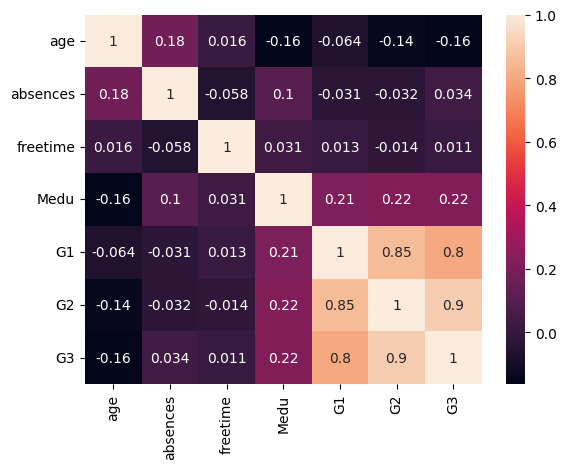

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["Medu","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["age","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["age","Medu","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["absences","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["freetime","G1","G2","G3"]]

In [ ]:
df.head()

,freetime,G1,G2,G3
0,3,5,6,6
1,3,5,5,6
2,3,7,8,10
3,2,15,14,15
4,3,6,10,10


In [ ]:
predict = "G3"
X = np.array(df.drop([predict],1))
Y = np.array (df[predict])

<ipython-input-69-b58325e9bc7d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop([predict],1))


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=1211)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
acc = model.score (X_test,Y_test)
print(acc)

0.9050605075235477


In [ ]:
model4 = linear_model.SGDRegressor()
model4.fit(X_train,Y_train)
acc4 = model4.score(X_test,Y_test)
print(acc4)

0.8892274726373044


In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df.corr()

<ipython-input-73-777638087bc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9050605075235477
